In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/opt/tljh/user/lib/moab/lib/python3.6/site-packages/pymoab-5.1.0-py3.6-linux-x86_64.egg')
from pymoab import core, types
from pymoab.rng import Range
import generate_stats as gs

# TYPE FILENAME BELOW

In [2]:
input_file = 'sample-wwig.h5m'

In [3]:
my_core = core.Core()
my_core.load_file(input_file)

In [4]:
root_set = my_core.get_root_set()
entity_types = [types.MBVERTEX, types.MBTRI, types.MBENTITYSET]

In [5]:
stats, data = gs.collect_statistics(my_core, root_set)

In [6]:
def show_data(data):
    spv_hist(np.array(list(data['S_P_V'].values())))
    tps_hist(np.array(list(data['T_P_S'].values())))
    tpv_hist(np.array(data['T_P_V']))

In [7]:
def spv_hist(spv_data):
    fig, ax = plt.subplots()
    plt.hist(spv_data, range = (min(spv_data)-1, max(spv_data)+1))
    ax.set_title('Surfaces per Volume')
    ax.set_xlabel('Surfaces')
    ax.set_ylabel('Occurences')

In [8]:
def tps_hist(tps_data):
    fig, ax = plt.subplots()
    plt.hist(tps_data)
    ax.set_title('Triangles per Surface')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')

In [11]:
def tpv_hist(tpv_data):
    fig, ax = plt.subplots()
    plt.hist(tpv_data)
    ax.set_title('Triangles per Vertex')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')

dict_keys(['S_P_V', 'T_P_S', 'T_P_V'])


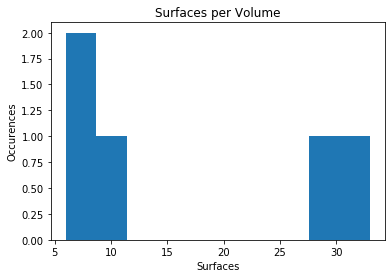

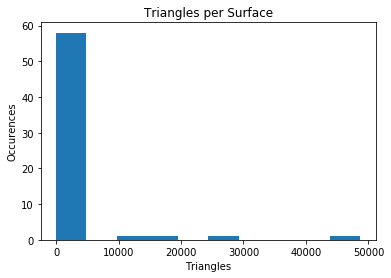

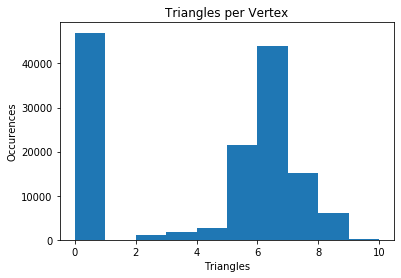

In [10]:
show_data(data)